In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

from notebook_utils import plot, mean_filter
import pytorch_drl.models.sac_models as models
from pytorch_drl.utils.exploration import *
from pytorch_drl.algs.sac import SAC

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#
print("Device:", device)


Device: cuda:0


## Create environment

In [4]:
env_name = "Pendulum-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.shape[0]

print("State size:", state_size, "\nAction size:", action_size)
print(env.action_space.high, env.action_space.low)

State size: 3 
Action size: 1
[2.] [-2.]


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## Define parameters

In [6]:
tmax = 500
n_episodes = 500
seed = 0

## SAC Test



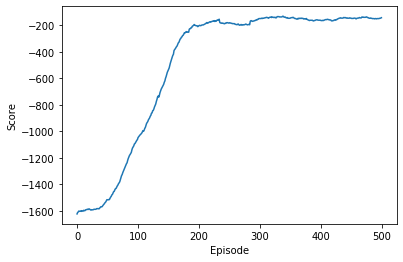

In [7]:
value_net1 = models.SACValueNetwork(state_size, action_size, 256, 256)
value_net2 = models.SACValueNetwork(state_size, action_size, 256, 256)
policy_net = models.SACPolicyNetwork(state_size, action_size, 256, 256)

max_act = env.action_space.high
min_act = env.action_space.low

lr_val = 1e-3
lr_pol = 1e-3



agent = SAC(policy_net=policy_net,
             value_net1=value_net1,
             value_net2=value_net1,
             lr_val=lr_val,
             lr_pol=lr_pol,
             buf_size=int(1e5),
             batch_size=64,
             tau=1e-3,
             device=device,
             max_grad_norm=0.5,
             min_act=min_act,
             max_act=max_act,
             warm_up=1e2,
             learn_every=2)

alg_name = "sac_{}".format(env_name)
max_score = -20.
scores = agent.train(env, tmax, n_episodes, alg_name, max_score)
plot(scores, 50)

### Trained Agent Demonstration

In [ ]:
agent.test(env, tmax, render=True, n_episodes=5)